In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaning/__results__.html
/kaggle/input/cleaning/__notebook__.ipynb
/kaggle/input/cleaning/__output__.json
/kaggle/input/cleaning/custom.css
/kaggle/input/cleaning/cleaned_out/matches.pkl
/kaggle/input/cleaning/cleaned_out/deliveries.pkl
/kaggle/input/cleaning/cleaned_out/teams.pkl
/kaggle/input/cleaning/cleaned_out/teamwise_home_and_away.pkl
/kaggle/input/cleaning/cleaned_out/players.pkl
/kaggle/input/cleaning/cleaned_out/most_runs_average_strikerate.pkl
/kaggle/input/world-cities/worldcities.csv
/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx
/kaggle/input/top-500-indian-cities/cities_r2.csv


# Read cleaned data

In [2]:
base = '/kaggle/input/cleaning/cleaned_out/'
names = ['matches','teamwise_home_and_away','deliveries','most_runs_average_strikerate','teams','players']
for i,name in enumerate(names):
    my_code = name+'='+'pd.read_pickle("'+base+name+'.pkl'+'")'
    exec(my_code)
    

# Questions we will try to answer 
> 1. How was the performance of each team developing in each season ?
> 2. Does certain teams have weaknesses against some specific other teams ?
> 3. Does playing in certain cities affects some teams performance ?
> 4. Who are the players recognized as the player of the match frequently ?




# Let's see what are the seasons we have

In [3]:
sorted(matches.Season.unique())

['IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2017',
 'IPL-2018',
 'IPL-2019']

# We have Seasons from 2008 to 2019

In [4]:
matches['Season'] = matches['Season'].str[-4:].astype(int)
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,none
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,none
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,none
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,none
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,none,none,none


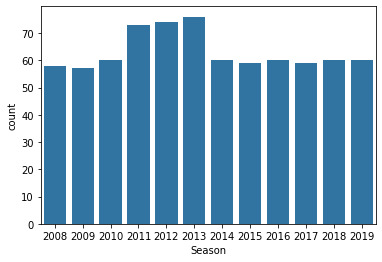

In [5]:
c = sns.color_palette()[0]
sns.countplot(x="Season", data=matches,color = c);

> 2011 - 2013 seasons are the seasons with bigger number of matches between all the seasons

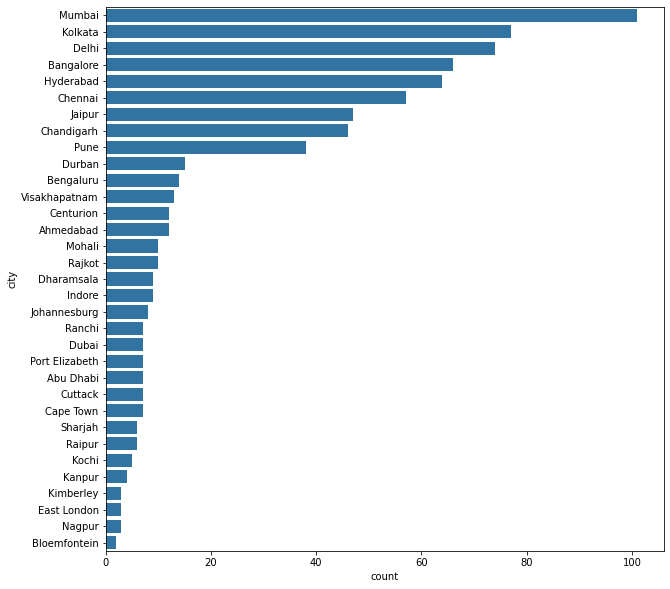

In [6]:
plt.figure(figsize = (10,10))
sns.countplot(y="city", data=matches,order = matches['city'].value_counts().index,color = c);

> Most of the matches are played in big Indian cities 

In [7]:
world_cities = pd.read_csv('/kaggle/input/world-cities/worldcities.csv')
world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [8]:
matches_world = matches.join(world_cities[['city','country','population']].set_index('city'), on='city', how='left')
matches_world.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,country,population
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,none,NaN,NaN
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,none,India,7764000.0
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,none,NaN,NaN
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,none,India,2201927.0
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,none,none,none,India,13707000.0


*Let's see how many cities are left without population and country*

In [9]:
matches_world[matches_world['country'].isnull()].city.unique()

array(['Hyderabad', 'Rajkot', 'Kolkata', 'Chandigarh', 'Kanpur',
       'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Ranchi',
       'Mohali', 'Bengaluru'], dtype=object)

*12 city of the 33 cities and most of them are indian cities*

In [10]:
indian_cities = pd.read_csv('/kaggle/input/top-500-indian-cities/cities_r2.csv')

In [11]:
indian_cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


**Let's see what cities we got**

In [12]:
ind_cities = indian_cities.name_of_city.unique()
print(len(set(matches_world[matches_world['country'].isnull()].city.unique()) - set(ind_cities)))
set(matches_world[matches_world['country'].isnull()].city.unique()) - set(ind_cities)

10


{'Ahmedabad',
 'Chandigarh',
 'Dharamsala',
 'Hyderabad',
 'Kanpur',
 'Kolkata',
 'Mohali',
 'Nagpur',
 'Rajkot',
 'Ranchi'}

So we got 2 countries

In [13]:
indian_cities.head(10)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


> We can see here that Ahmadabad is just spelled differently 

> We can recognize a proplem with the data set as Chandigarh exists in both datasets but is not detected in the matches df

> There are spaces in the end of every name 

In [14]:
indian_cities['name_of_city'] = indian_cities['name_of_city'].str.strip()
ind_cities = indian_cities.name_of_city.unique()

print(len(set(matches_world[matches_world['country'].isnull()].city.unique()) - set(ind_cities)))
set(matches_world[matches_world['country'].isnull()].city.unique()) - set(ind_cities)

4


{'Ahmedabad', 'Dharamsala', 'Hyderabad', 'Mohali'}

> Now we have just 4 cities with unknown names let's check the spell

> Looks like we can just solve AhmedAbad problem for now

> The indian data set is from 2011 and the world data set is from 2020, so we will just use the necessary data from the indian dataset with a column indicating the source

In [15]:
indian_cities = indian_cities.rename(columns = {'name_of_city':'city','population_total':'population'})
indian_cities['country'] = 'India'
indian_cities.loc[indian_cities[indian_cities['city'] == 'Ahmadabad'].index,'city'] = 'Ahmedabad'

In [16]:
c1 = set(matches_world[matches_world['country'].isnull()].city.unique())

cs = c1.intersection(ind_cities)
cs.add('Ahmedabad')
cs

{'Ahmedabad',
 'Bengaluru',
 'Chandigarh',
 'Kanpur',
 'Kolkata',
 'Nagpur',
 'Rajkot',
 'Ranchi',
 'Visakhapatnam'}

In [17]:
df1 = indian_cities[indian_cities['city'].isin(cs)][['city','country','population']]
df1

,city,country,population
7,Ahmedabad,India,5570585
72,Bengaluru,India,8425970
115,Chandigarh,India,960787
251,Kanpur,India,2767031
274,Kolkata,India,4486679
334,Nagpur,India,2405421
392,Rajkot,India,1286995
397,Ranchi,India,1073440
487,Visakhapatnam,India,1730320


In [18]:
df2 = pd.concat([world_cities[['city','country','population']],df1])
matches_world = matches.join(df2.set_index('city'), on='city', how='left')
matches_world[matches_world['country'].isnull()].city.unique()

array(['Hyderabad', 'Dharamsala', 'Mohali'], dtype=object)

> We can search google for populations

In [19]:
matches_world['country'] = matches_world['country'].fillna('India')
populations = [6.81*10**6,53,543,146,213]
for pop,city in zip(populations,['Hyderabad', 'Dharamsala', 'Mohali']):
    matches_world.loc[matches_world[matches_world['city'] == city].index,'population'] = pop
    

In [20]:
matches_world['country'].value_counts()

India                   679
United States            74
South Africa             57
United Arab Emirates     20
Canada                    3
United Kingdom            3
Name: country, dtype: int64

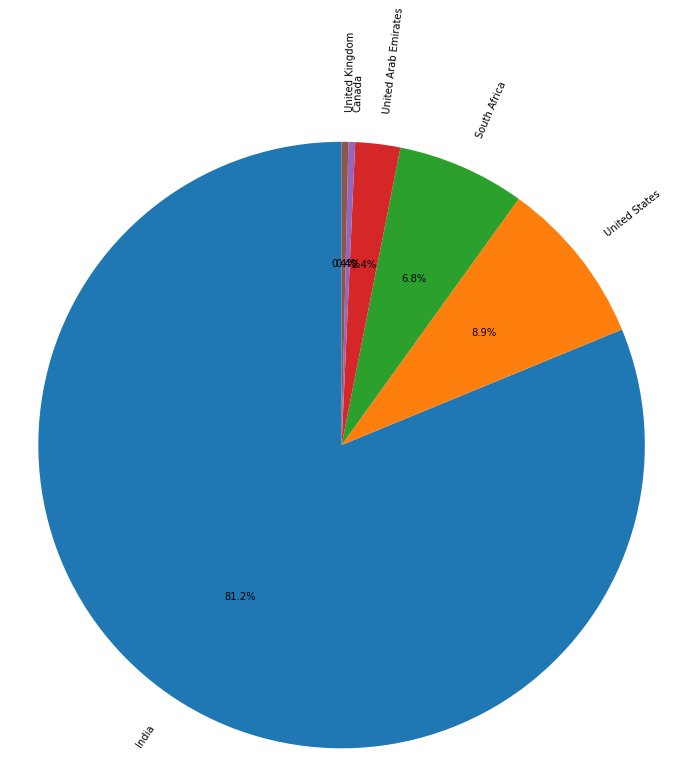

In [21]:


s = matches_world['country'].value_counts()
labels = s.index
sizes = s.values
# explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',rotatelabels = True,
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

> India takes part in 81.2% of the mathces followed by the US, then South Africa, Emirates, UK, and South Africa

# Let's see how much matches each team played 

In [22]:
k = matches_world['team1'].value_counts().sort_index()+matches_world['team2'].value_counts().sort_index()
k = k.sort_values()
k

Kochi Tuskers Kerala            15
Rising Pune Supergiants         15
Rising Pune Supergiant          17
Delhi Capitals                  23
Gujarat Lions                   33
Pune Warriors                   48
Deccan Chargers                 83
Sunrisers Hyderabad            116
Rajasthan Royals               160
Chennai Super Kings            174
Kolkata Knight Riders          188
Kings XI Punjab                189
Royal Challengers Bangalore    189
Mumbai Indians                 198
Delhi Daredevils               224
dtype: int64

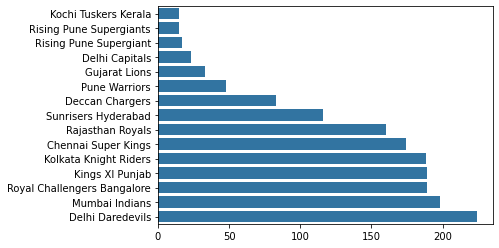

In [23]:
sns.barplot(y=k.index,x=k,color=c);

> Some teams play a lot of matches and others don't

# Let's check  the winning rate of each team on each season

In [24]:
w = matches_world.groupby(['Season','winner'])['id'].count()

<AxesSubplot:xlabel='Season', ylabel='winner'>

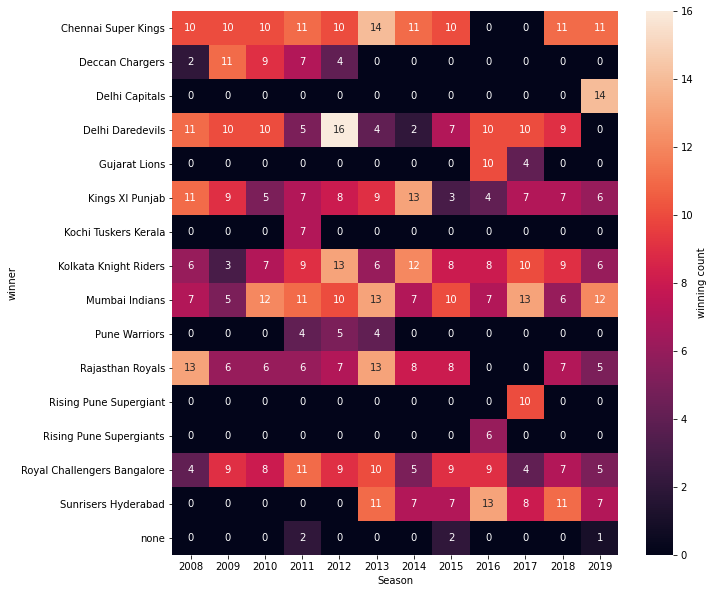

In [25]:
plt.figure(figsize=(10,10))
w = w.reset_index()
w_piv = w.pivot(index = 'winner', columns = 'Season',
                            values = 'id').fillna(0)
sns.heatmap(w_piv, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'winning count'})

> We can see here that there are some teams that appears for only a period of time and there are 8 teams that are almost played on all seasons

> we can see also there are some teams with high flactuations in winning and others with more stable performance

## 2. Does certain teams have weaknesses against some specific other teams ?

#### Let's first get the distripution of the teams compinations

In [26]:
def get_duals_sets(x):
    l = list(set((x[4],x[5])))
    return l[0]+"_"+l[1]
matches_world_eda = matches_world.copy()
matches_world_eda['duals_sets'] = matches_world.apply( get_duals_sets,axis=1)
matches_world_eda.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,country,population,duals_sets
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,none,India,6810000.0,Sunrisers Hyderabad_Royal Challengers Bangalore
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,none,India,7764000.0,Rising Pune Supergiant_Mumbai Indians
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,none,India,1286995.0,Gujarat Lions_Kolkata Knight Riders
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,none,India,2201927.0,Kings XI Punjab_Rising Pune Supergiant
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,none,none,none,India,13707000.0,Delhi Daredevils_Royal Challengers Bangalore


<AxesSubplot:xlabel='duals_sets'>

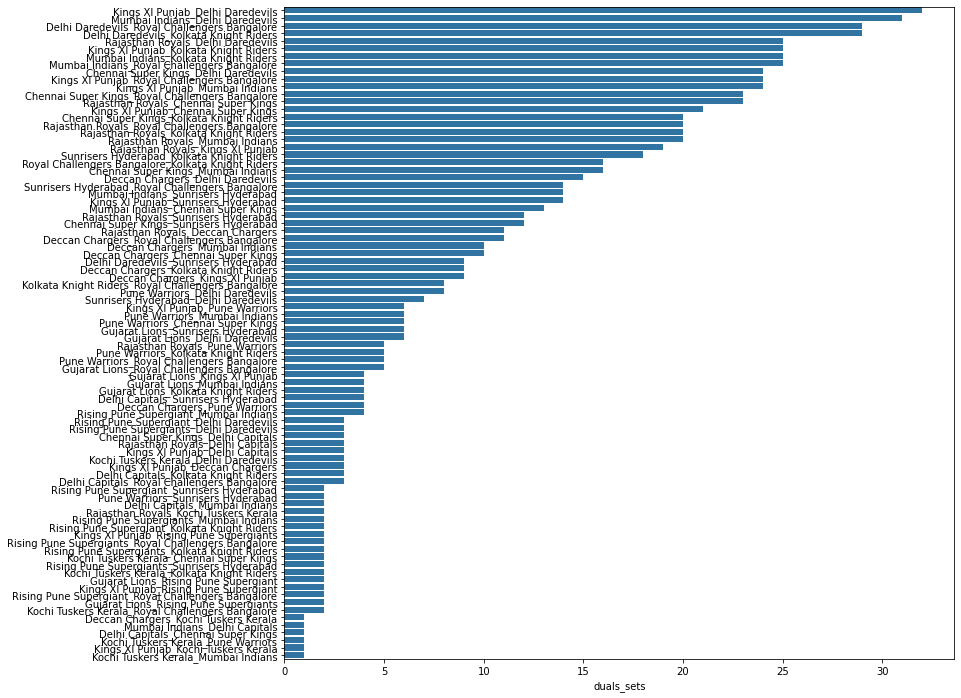

In [27]:
k = matches_world_eda['duals_sets'].value_counts()
plt.figure(figsize=(12,12))
sns.barplot(y = k.index,x = k,color=c)

> Duals numbers ranges from 1 to 30

> Let's see who are the teams that are strong specially against certain teams

In [28]:
def get_win_rate(x):
#     print(type())
    first_team = x.name.split('_')[0]
    
    return 100*sum(x == first_team)/len(x),len(x)

win = matches_world_eda.groupby('duals_sets')['winner'].apply(get_win_rate)
win

duals_sets
Chennai Super Kings_Delhi Capitals                                 (100.0, 3)
Chennai Super Kings_Delhi Daredevils                  (66.66666666666667, 24)
Chennai Super Kings_Kolkata Knight Riders                          (65.0, 20)
Chennai Super Kings_Mumbai Indians                                 (37.5, 16)
Chennai Super Kings_Royal Challengers Bangalore       (65.21739130434783, 23)
                                                               ...           
Rising Pune Supergiants_Sunrisers Hyderabad                         (50.0, 2)
Royal Challengers Bangalore_Kolkata Knight Riders                 (56.25, 16)
Sunrisers Hyderabad_Delhi Daredevils                  (42.857142857142854, 7)
Sunrisers Hyderabad_Kolkata Knight Riders             (44.44444444444444, 18)
Sunrisers Hyderabad_Royal Challengers Bangalore      (57.142857142857146, 14)
Name: winner, Length: 86, dtype: object

> Let's filter duals that played more than 10 matches against each others

In [29]:
k =  win.values
idx = [j for j,i in enumerate(k) if (i[0]>50 or i[0]<40) and i[1]>10]
w = win[idx]

> Some sorting and preparing

In [30]:
w_idx = w.index
w_final = []
t_final = []
for i in range(len(w)):
    k = w_idx[i].split('_')
    w_now = w[i][0]
    if w_now>50:
        t_final.append(k[0]+"_"+k[1])
        w_final.append(w_now)
    else:
        t_final.append(k[1]+"_"+k[0])
        w_final.append(100-w_now)
        

In [31]:
w_sorted = pd.Series(w_final,t_final).sort_values(ascending=False)
v1 = w_sorted.values
v2 = 100-v1
t_final = np.array([[k.split("_")[0],k.split("_")[1]] for k in w_sorted.index]).flatten()

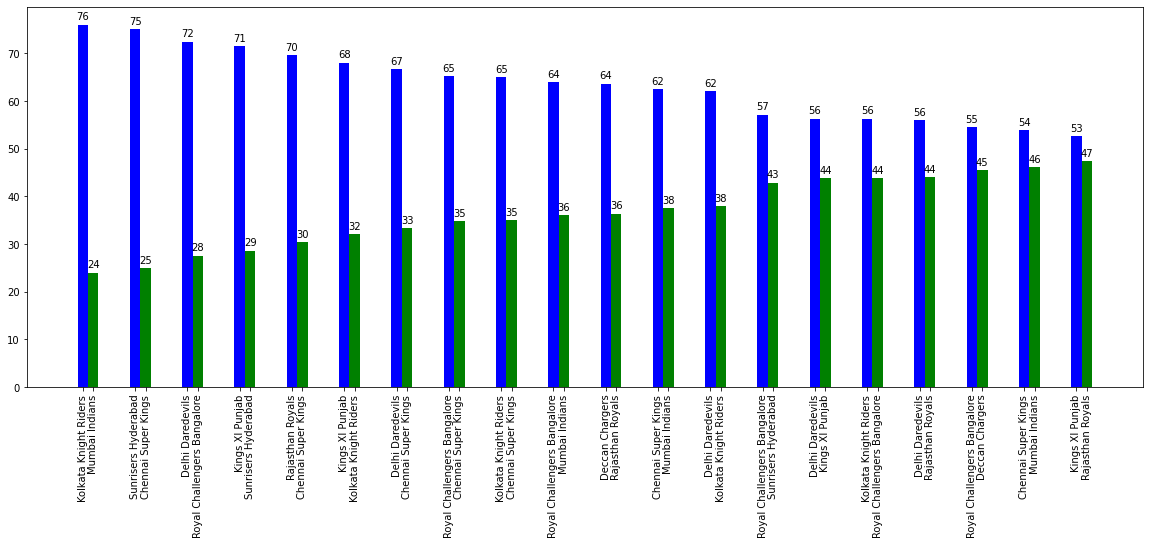

In [32]:
x1 = np.arange(len(v1))
x2 = np.array([[i,i-0.2]for i in range(len(v1))]).flatten()
f = plt.figure(figsize=(20,7))
ax = f.add_subplot(111)
r1 = ax.bar(x1-0.2, v1, width=0.2, color='b', align='center');
r2 = ax.bar(x1, v2, width=0.2, color='g', align='center');
ax.set_xticks(x2);
ax.set_xticklabels(t_final);
ax.bar_label(r1, padding=3,fmt='%.0f')
ax.bar_label(r2, padding=3,fmt='%.0f')
plt.xticks(rotation=90);


*Some teams perform really well against certain teams as we can see*

Let's check the affect of cities on various teams

> Let's check that for the first most 10 frequent countries and the teams with more consistent data (look the heat map above) 

Let's get the number of seasons played per team

In [33]:
seasons_played_num = []
for i,row in w_piv.iterrows():
    seasons_played_num.append((i,len([k for k in row if k>0])))
seasons_played_num = sorted(seasons_played_num,key=lambda x:x[1],reverse=True)
seasons_played_num

[('Kings XI Punjab', 12),
 ('Kolkata Knight Riders', 12),
 ('Mumbai Indians', 12),
 ('Royal Challengers Bangalore', 12),
 ('Delhi Daredevils', 11),
 ('Chennai Super Kings', 10),
 ('Rajasthan Royals', 10),
 ('Sunrisers Hyderabad', 7),
 ('Deccan Chargers', 5),
 ('Pune Warriors', 3),
 ('none', 3),
 ('Gujarat Lions', 2),
 ('Delhi Capitals', 1),
 ('Kochi Tuskers Kerala', 1),
 ('Rising Pune Supergiant', 1),
 ('Rising Pune Supergiants', 1)]

> We can see that the highest 7 have 10 seasons played and above, so we will consider them

In [34]:
city_teams = seasons_played_num[:8]
city_teams = [k[0] for k in city_teams]
cities = matches['city'].value_counts()[:11].index


In [35]:
matches_cities = matches_world_eda[matches_world_eda.city.isin(cities)]
matches_cities = matches_cities[['team1','team2','winner','city']]
matches_cities.shape

(673, 4)

In [36]:
def get_loser(row):
#     print(row)
    t1 = row[0]
    t2 = row[1]
    w = row[2]
    return t1 if w!=t1 else t2
matches_cities['loser'] = matches_cities.apply(get_loser,axis=1)

In [37]:
w = matches_cities.groupby(['city','winner']).count()['team1']
l = matches_cities.groupby(['city','loser']).count()['team2']
w_l = pd.concat([w, l], axis=1).fillna(0)
w_l['win_rate'] = 100*w_l['team1']/(w_l['team2']+w_l['team1'])
w_l = w_l.reset_index()
w_l = w_l[w_l['level_1'].isin(city_teams)]

w_l.head()

,city,level_1,team1,team2,win_rate
0,Bangalore,Chennai Super Kings,4.0,3.0,57.142857
2,Bangalore,Delhi Daredevils,3.0,5.0,37.500000
4,Bangalore,Kings XI Punjab,5.0,5.0,50.000000
6,Bangalore,Kolkata Knight Riders,6.0,5.0,54.545455
7,Bangalore,Mumbai Indians,8.0,2.0,80.000000


<AxesSubplot:xlabel='city', ylabel='level_1'>

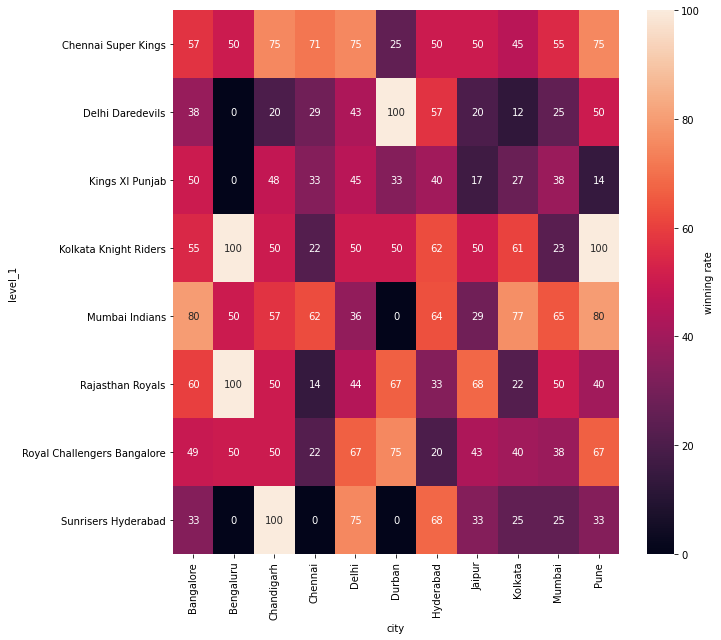

In [38]:
plt.figure(figsize=(10,10))
w_l_piv = w_l.pivot(index = 'level_1', columns = 'city',
                            values = 'win_rate').fillna(0)

sns.heatmap(w_l_piv, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'winning rate'})

We can see genrally the high variability in winning rates in various cities, so let's check the number of matche each team played in each city

<AxesSubplot:xlabel='city', ylabel='level_1'>

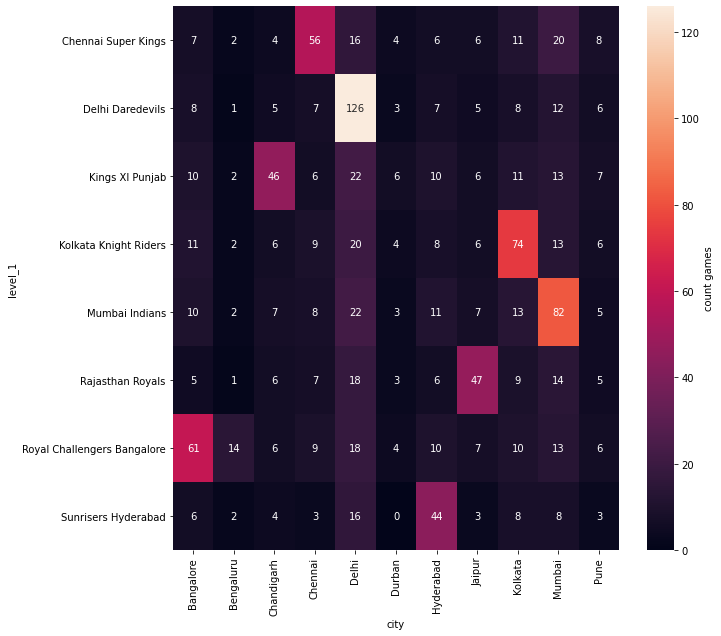

In [39]:
w_l['count_games'] = w_l['team2']+w_l['team1']
w_l = w_l.reset_index()
w_l = w_l[w_l['level_1'].isin(city_teams)]
plt.figure(figsize=(10,10))
w_l_piv = w_l.pivot(index = 'level_1', columns = 'city',
                            values = 'count_games').fillna(0)

sns.heatmap(w_l_piv, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'count games'})

> We can see a couple of observations here:
1- Each team has a certain country that it played most of its matches in 
2- Delhi is the highest country in the number of matches all the big teams are playing 

## Now let's check the player of the match histogram  

In [40]:
print(matches_world_eda['player_of_match'].nunique())
p_o_m = matches_world_eda['player_of_match'].value_counts()

227


In [41]:
p_o_m[p_o_m>9]

CH Gayle          22
AB de Villiers    21
DA Warner         20
MS Dhoni          18
RG Sharma         17
SR Watson         16
A Mishra          16
YK Pathan         16
G Gambhir         14
MEK Hussey        14
DR Smith          14
SK Raina          14
V Sehwag          14
AM Rahane         13
V Kohli           13
JH Kallis         11
AD Russell        11
UT Yadav          10
KA Pollard        10
Name: player_of_match, dtype: int64

> we can see some players with high number of honors, but unfortunately we can't use this as a feature for our model unless we know that one of these players will play in the match

In [42]:
out_base = "/kaggle/working/"
mode = 0o666
if not os.path.exists(out_base):
    os.mkdir(out_base,mode)

In [43]:
matches_world_eda.to_pickle(out_base+"/matches_world_eda.pkl")

## Next we will do feature engineering based on the insights we saw here